In [1]:
import pandas as pd
import datetime as dt

In [2]:
#import engagement data
engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates = ['time_stamp'])

engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
#Import users and rename object_id to user_id
users = pd.read_csv('takehome_users.csv', encoding = 'latin-1')
users = users.rename(columns={'object_id': 'user_id'})
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
#Assign numerical value for week to make comparison easier
engagement['week'] = engagement['time_stamp'].dt.week

In [5]:
#Groupby week and user_id so we can count frequencies
engagement = engagement.groupby(['week', 'user_id'])['time_stamp'].count()

engagement.head()

week  user_id
1     2          1
      10         5
      42         4
      43         1
      46         1
Name: time_stamp, dtype: int64

In [6]:
engagement = engagement.reset_index(name='freq')
engagement.head()

,week,user_id,freq
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1


In [7]:
frequencies = engagement[engagement.freq>=3]
frequencies = frequencies[['user_id']]
frequencies = frequencies.drop_duplicates()

adopted = frequencies.user_id.tolist()

print(adopted)
print(len(adopted))

[10, 42, 63, 69, 81, 82, 87, 146, 153, 160, 168, 197, 202, 203, 209, 230, 245, 263, 297, 310, 322, 445, 471, 483, 509, 510, 529, 535, 553, 564, 603, 605, 639, 669, 679, 680, 724, 728, 754, 772, 783, 804, 845, 882, 885, 901, 906, 912, 934, 937, 943, 980, 1017, 1018, 1027, 1055, 1061, 1072, 1094, 1099, 1128, 1129, 1155, 1196, 1202, 1280, 1320, 1339, 1343, 1345, 1350, 1357, 1368, 1407, 1411, 1421, 1434, 1464, 1472, 1476, 1479, 1485, 1507, 1576, 1617, 1624, 1665, 1693, 1709, 1730, 1754, 1769, 1781, 1783, 1786, 1811, 1821, 1822, 1836, 1865, 1879, 1885, 1941, 2002, 2011, 2013, 2033, 2042, 2074, 2078, 2080, 2103, 2113, 2159, 2171, 2193, 2246, 2253, 2270, 2271, 2286, 2289, 2300, 2316, 2324, 2333, 2339, 2390, 2406, 2425, 2447, 2474, 2490, 2502, 2519, 2539, 2548, 2557, 2566, 2568, 2571, 2604, 2620, 2622, 2647, 2658, 2672, 2723, 2727, 2739, 2744, 2771, 2809, 2832, 2881, 2889, 2895, 2915, 2939, 2979, 3017, 3028, 3032, 3039, 3066, 3067, 3087, 3093, 3112, 3113, 3137, 3139, 3160, 3175, 3180, 3185, 31

In [8]:
#Create column of 1's on frequencies, which we can use for ML prediction model. We can join this dataframe with users
frequencies['adopted'] = 1
frequencies.head()

,user_id,adopted
1,10,1
2,42,1
5,63,1
6,69,1
7,81,1


In [9]:
combined = users.merge(frequencies, how = 'outer', on = 'user_id')

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       1445 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [10]:
combined.adopted.unique()

array([nan,  1.])

In [11]:
#Change nan to 1 with method

def change_nan(i):
    if i == 1:
        return 1
    else:
        return 0

combined.adopted = combined.adopted.apply(change_nan)

combined.adopted.unique()
        



array([0, 1])

In [12]:
#Change values of creation_source and invited_by_user_id

#since invited_by_user_id has null values, we want to make this column binary. 1 for people who were invited and 0 for people who weren't

def user_id(i):
    if i > 0:
        return 1
    else:
        return 0
    
combined.invited_by_user_id = combined.invited_by_user_id.apply(user_id)
combined.invited_by_user_id.unique()
    

array([1, 0])

In [13]:
combined.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [14]:
#Create copy of combined for data analysis

combined2 = combined.copy()

In [15]:
#Assign numerical values to creation_source


def creation(i):
    if i == 'GUEST_INVITE':
        return 0
    elif i == 'ORG_INVITE':
        return 1
    elif i == 'SIGNUP':
        return 2
    elif i == 'PERSONAL_PROJECTS':
        return 3
    else:
        return 4

combined.creation_source = combined.creation_source.apply(creation)
combined.creation_source.unique()

array([0, 1, 2, 3, 4])

In [16]:
#Implement Machine learning - Gradient Boosting and Random Forest

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


def gbc(data):
    X, Xtest, y, ytest = train_test_split(data[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited_by_user_id']], data.adopted.values, random_state=5, test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))
    
    
def rfc(data):
    X, Xtest, y, ytest = train_test_split(data[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited_by_user_id']], data.adopted.values, random_state=5, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    print('Test score (Random Forest): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Random Forest): ' + str(clf.feature_importances_))

In [17]:
gbc(combined)

Test score (Gradient Boosting): 0.8783333333333333
Feature Importances (Gradient Boosting): [0.35214155 0.24158144 0.37280517 0.03347185]


In [18]:
rfc(combined)

Test score (Random Forest): 0.8783333333333333
Feature Importances (Random Forest): [0.70983872 0.10120953 0.10414239 0.08480937]


We can see that invited_by_user_id has a very light weighting, so we can run the model again without it

In [19]:
def gbc2(data):
    X, Xtest, y, ytest = train_test_split(data[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']], data.adopted.values, random_state=5, test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))
    
    
def rfc2(data):
    X, Xtest, y, ytest = train_test_split(data[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']], data.adopted.values, random_state=5, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    print('Test score (Random Forest): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Random Forest): ' + str(clf.feature_importances_))

In [20]:
gbc2(combined)

Test score (Gradient Boosting): 0.8783333333333333
Feature Importances (Gradient Boosting): [0.38561339 0.24158144 0.37280517]


In [21]:
rfc2(combined)

Test score (Random Forest): 0.8783333333333333
Feature Importances (Random Forest): [0.87061214 0.07049104 0.05889682]


Because creation_source is important to both, we can create a piechart to see the distribution of the sources to get a better understanding of what source(s) is/are most prevalent.

In [22]:
import matplotlib.pyplot as plt

In [23]:
#Create two dataframes to create
combined2_adopted = combined2[combined2.adopted == 1]
combined2_not_adopted = combined2[combined2.adopted == 0]

In [24]:
#Find Counts of creation_source column

combined2_adopted['creation_source'].value_counts()

ORG_INVITE            491
GUEST_INVITE          326
SIGNUP                275
SIGNUP_GOOGLE_AUTH    206
PERSONAL_PROJECTS     147
Name: creation_source, dtype: int64

In [25]:
#Find Counts of creation_source column

combined2_not_adopted['creation_source'].value_counts()

ORG_INVITE            3763
PERSONAL_PROJECTS     1964
GUEST_INVITE          1837
SIGNUP                1812
SIGNUP_GOOGLE_AUTH    1179
Name: creation_source, dtype: int64

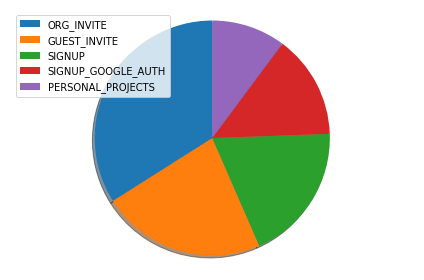

In [26]:
#Piechart of adopted users by creation source

labels = ['ORG_INVITE', 'GUEST_INVITE', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH', 'PERSONAL_PROJECTS']
count = [491, 326, 275, 206, 147]
patches, texts = plt.pie(count, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

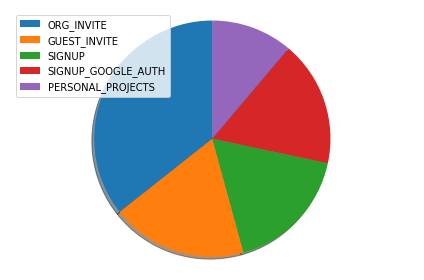

In [27]:
#Piechart of not adopted users by creation source

labels = ['ORG_INVITE', 'GUEST_INVITE', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH', 'PERSONAL_PROJECTS']
count = [3763, 1964, 1837, 1812, 1179]
patches, texts = plt.pie(count, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Although there is not a very significant difference in the proportions of each, the one category, the two that stand out that are increased in the piechart of the adopted users is that GUEST_INVITE and SIGNUP are a little bigger, which may make sense because those channels are better for turning a completely new user to an adopted user.